In [1]:
import sqlite3
import numpy as np

In [2]:
def fetchTrainingData(db, sqlCmd):
    try:
        conn = sqlite3.connect(db)
        cursor = conn.cursor()
        cursor.execute(sqlCmd)
        result = cursor.fetchall()
        conn.commit()
        cursor.close()
        return result

    except sqlite3.Error as error:
        print("Failed to run sqlite command", error)
    finally:
        if (conn):
            conn.close()

In [3]:
db_path = 'db/categorised_swecris.sqlite'

In [4]:
init = False
for ix in range(2,18):
    sqlCmd = f'''
        SELECT abstract, Formas1 AS class FROM clean_swecris
            WHERE class == '{ix}' ORDER BY RANDOM()
        '''
    result = np.array(fetchTrainingData(db_path, sqlCmd))
    if (not init and result.size > 0):
        training_data_Formas = np.copy(result)
        init = True
    elif (result.size > 0):
        training_data_Formas = np.vstack((training_data_Formas, result))

In [13]:
init = False
for ix in range(2,17):
    sqlCmd = f'''
        SELECT abstract, goals AS class FROM clean_goals
            WHERE class == '{ix}' ORDER BY RANDOM();
        '''
    result = np.array(fetchTrainingData(db_path, sqlCmd))
    if (not init and result.size > 0):
        training_data_Goals = np.copy(result)
        init = True
    else:
        training_data_Goals = np.vstack((training_data_Goals, result))

In [14]:
training_data = np.vstack((training_data_Goals, training_data_Formas))

In [15]:
import pandas as pd

In [16]:
training_data_df = pd.DataFrame(data=training_data[:,:], columns=['abstract', 'class'])

In [18]:
training_data_df.head()

,abstract,class
0,ingen hung hung vara en främst dödsorsak i vär...,2
1,god hälsa och välbefinnande god hälsa vara en ...,3
2,god utbildning för alla utbildning vara en gru...,4
3,jämställdhet jämställdhet mellan kvinna och ma...,5
4,ren vatten och sanitet för alla vatten vara en...,6


In [19]:
len(training_data_df)

754

In [20]:
training_data_df['len'] = training_data_df['abstract'].apply(lambda s : len(s))

<AxesSubplot:ylabel='Frequency'>

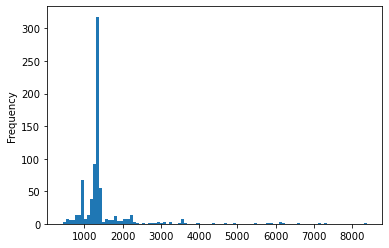

In [21]:
training_data_df['len'].plot.hist(bins=100)

In [22]:
training_data_df.len.quantile(0.9)

1924.5000000000002

In [24]:
from sqlalchemy import create_engine
table_name = 'Data_set'
db_path = 'db/training.sqlite'
db_path = 'sqlite:///' + db_path
engine = create_engine(db_path, echo=True)

In [25]:
training_data_df.to_sql(table_name, engine, if_exists='fail')

2020-12-16 15:58:00,303 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2020-12-16 15:58:00,304 INFO sqlalchemy.engine.base.Engine ()
2020-12-16 15:58:00,305 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2020-12-16 15:58:00,306 INFO sqlalchemy.engine.base.Engine ()
2020-12-16 15:58:00,307 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("Data_set")
2020-12-16 15:58:00,308 INFO sqlalchemy.engine.base.Engine ()
2020-12-16 15:58:00,310 INFO sqlalchemy.engine.base.Engine PRAGMA temp.table_info("Data_set")
2020-12-16 15:58:00,311 INFO sqlalchemy.engine.base.Engine ()
2020-12-16 15:58:00,313 INFO sqlalchemy.engine.base.Engine 
CREATE TABLE "Data_set" (
	"index" BIGINT, 
	abstract TEXT, 
	class TEXT, 
	len BIGINT
)


2020-12-16 15:58:00,314 INFO sqlalchemy.engine.base.Engine ()
2020-12-16 15:58:00,322 INFO sqlalchemy.engine.base.Engine COMMIT
2020-12-16 15:58:00,324 INFO sqlalchemy.engine.